In [1]:
# import lib
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

np.random.seed(6789)

(100, 2)


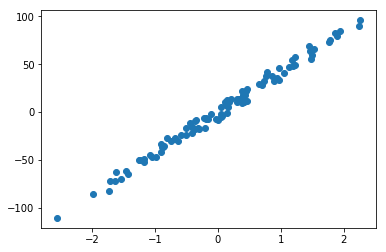

In [40]:
# create data
n_samples  = 100
n_outliers = 5
x, y      = datasets.make_regression(n_samples=n_samples, n_features=1,n_informative=1, noise=4, random_state=0)
X         = np.append(x,y[:,None],1)  

print(X.shape)
x -= np.mean(x, axis = 0)
plt.scatter(X[:,0],X[:,1]); plt.show()

In [41]:
# simple objective
w = np.random.uniform(0,1,size=(2,1))
# w = np.random.randn(2,1)
w = w / np.sqrt((w**2).sum())
print(w)
m = np.zeros_like(w)
v = np.zeros_like(w)

[[0.76183748]
 [0.64776821]]


In [46]:
# simple objective
for iter in range(3000):
    loss = (X - X @ w @ w.T)
    grad = (X.T @ loss @ w) + (w.T@X.T@loss).T
    
    m = 0.9 * m   + (1-0.9)   * grad
    v = 0.999 * v + (1-0.999) * grad ** 2
    
    m_hat = m/(1-0.9)
    v_hat = v/(1-0.999)
    
    if iter%100 == 0 :
        print("Current loss: " + str((loss**2).mean()) + "  Weight : " + str(w.ravel()))
    w = w - 0.0008 * (m_hat/(np.sqrt(v_hat)+1e-8))
    w = w / np.sqrt((w**2).sum())


Current loss: 517.5327435737797  Weight : [0.76184608 0.6477581 ]
Current loss: 550.0561881281357  Weight : [0.78431385 0.62036423]
Current loss: 581.6018722457598  Weight : [0.80543617 0.59268253]
Current loss: 611.9322154290103  Weight : [0.82516716 0.56488863]
Current loss: 640.8529965193778  Weight : [0.84348698 0.53714962]
Current loss: 668.2154333277362  Weight : [0.86039949 0.50962018]
Current loss: 693.9170028633197  Weight : [0.87593003 0.48243817]
Current loss: 717.8988537019223  Weight : [0.89012197 0.45572237]
Current loss: 740.1409440383079  Weight : [0.9030327  0.42957182]
Current loss: 760.6559695953663  Weight : [0.91472962 0.40406648]
Current loss: 779.482935129971  Weight : [0.92528658 0.3792687 ]
Current loss: 796.6809707029331  Weight : [0.93478074 0.35522524]
Current loss: 812.3237605277184  Weight : [0.94329015 0.33196941]
Current loss: 826.4947663886211  Weight : [0.95089185 0.30952334]
Current loss: 839.2832953587049  Weight : [0.95766047 0.28790001]
Current los

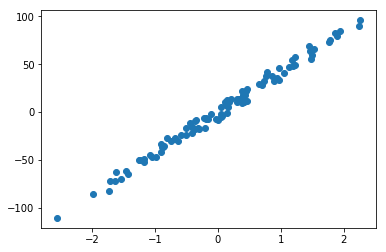

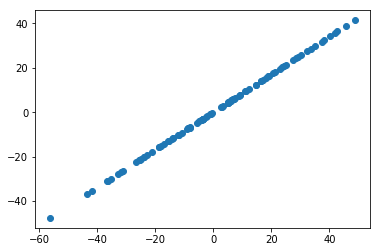

[[0.76183845]
 [0.64776707]]


In [43]:
recon = (X @ w @ w.T)
plt.scatter(X[:,0],X[:,1]); 
plt.show()
plt.scatter(recon[:,0],recon[:,1]); plt.show()
print(w)

In [222]:
print(X.shape)

(100, 2)


(2,)


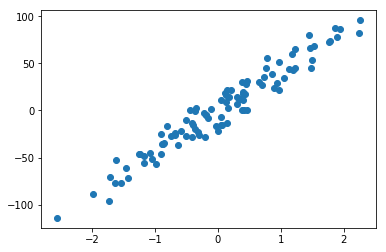

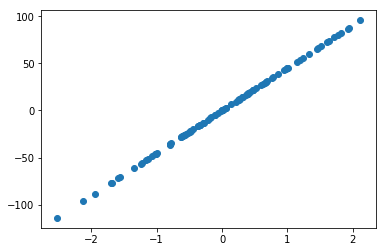

In [252]:
cov = X.T @ X / X.shape[0]
evals,evecs = np.linalg.eig(cov)
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]
print(evecs[0,:].shape)
good_project = evecs[0,:][:,None]
recon_gt = (X @ good_project @ good_project.T)
plt.scatter(X[:,0],X[:,1]);         plt.show()
plt.scatter(recon_gt[:,0],recon_gt[:,1]); plt.show()

In [56]:
# simple objective
w = np.random.randn(2,1)
print(w)

ww = w/np.sqrt((w**2).sum())
print(ww)
print((ww**2).sum())

[[-0.99090501]
 [ 0.4142096 ]]
[[-0.92263583]
 [ 0.3856723 ]]
1.0


In [54]:
temp = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
print(np.sqrt(temp**2).sum())
print(
np.linalg.norm(temp)
)
print(
np.sqrt((temp**2).sum())
)
print(
temp@temp.T
)
print(
(temp**2).sum()
)

1.4142135623730951
1.0
1.0
1.0000000000000002
1.0000000000000002


# Reference 
1. Brownlee, J. (2018). How to Generate Test Datasets in Python with scikit-learn. Machine Learning Mastery. Retrieved 30 March 2019, from https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
2. notebook, S., & Davies, L. (2017). Shortcut key for changing code cell to markdown cell in jupyter notebook. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/47787721/shortcut-key-for-changing-code-cell-to-markdown-cell-in-jupyter-notebook
3. NumPy?, H., Hoogendoorn, E., Feicho, E., Travnik, J., & Hsu, W. (2014). How to normalize an array in NumPy?. Stack Overflow. Retrieved 30 March 2019, from https://stackoverflow.com/questions/21030391/how-to-normalize-an-array-in-numpy
4. An overview of gradient descent optimization algorithms. (2016). Sebastian Ruder. Retrieved 30 March 2019, from http://ruder.io/optimizing-gradient-descent/index.html#adam
5. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 30 March 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-resultsa